In [1]:
import numpy as np
pi = np.pi
r = 235/280
a = np.deg2rad(10)
offset = 0.005
b= a + np.arctan((np.tan(a)+offset)/r)
c =b-a
# print(a,b,c)

arr = np.array([0,a,0,b,-c,0,-a,0,-b,c])
# Method 1: numpy.array2string()
formatted_str = np.array2string(arr, separator=',', suppress_small=True, formatter={'float_kind':lambda x: "%.3f" % x})
print(formatted_str)  # Remove the square brackets


[0.000,0.175,0.000,0.387,-0.213,0.000,-0.175,0.000,-0.387,0.213]


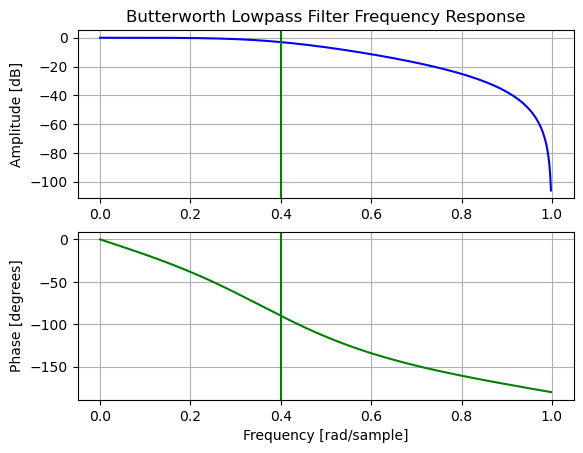

[0.20657208 0.41314417 0.20657208] [ 1.         -0.36952738  0.19581571]


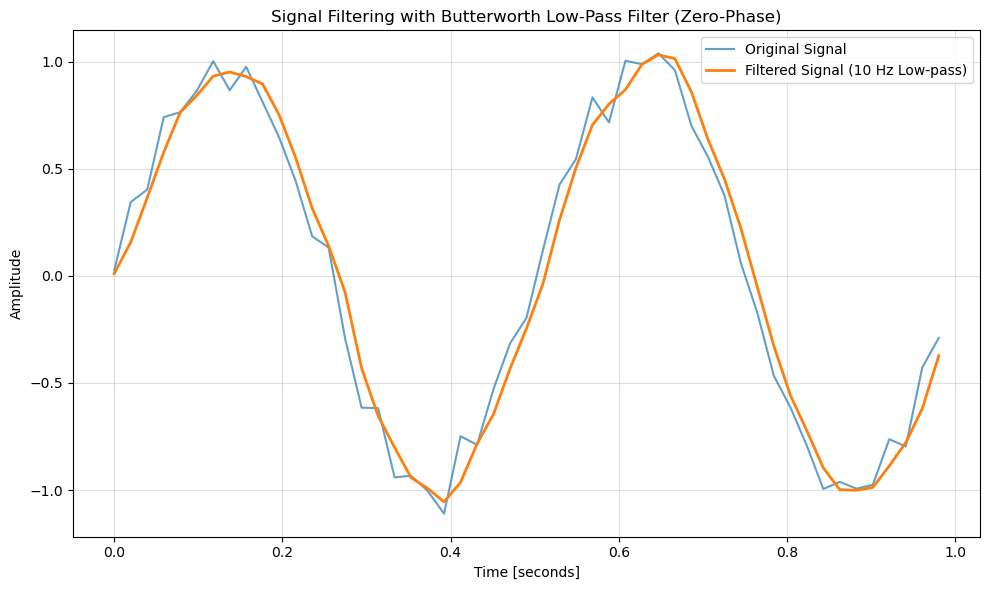

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# y[n] = b0*x[n] + b1*x[n-1] + ... + bk*x[n-k] - a1*y[n-1] - ... - ak*y[n-k]


cut_off_frequency = 10
fs = 50
filter_order = 2 # Filter order

b, a = signal.butter(N=filter_order, Wn=cut_off_frequency, btype='low', analog=False,fs=50)

# Frequency Axis
w, h = signal.freqz(b, a)

# Plotting
plt.figure()

# Magnitude Response
plt.subplot(2, 1, 1)
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
plt.title('Butterworth Lowpass Filter Frequency Response')
plt.ylabel('Amplitude [dB]')
plt.grid()


# Phase Response
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.unwrap(np.angle(h))*180/np.pi, 'g')
plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
plt.ylabel('Phase [degrees]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

plt.show()
print(b,a)


x = [0] * filter_order    # Input sample buffer
y = [0] * filter_order    # Output sample buffer

# Generate Test Signal (Simulating a Continuous Signal with Noise)
t = np.linspace(0, 1, fs+1, False)
sig = np.sin(2*np.pi*2*t) + 0.1*np.sin(2*np.pi*20*t) + 0.05 * np.random.randn(fs+1)  # Added some noise

# Filtering in Real-Time
filtered_signal = []
for sample in sig:
    x.pop(0)
    x.append(sample)

    filtered_sample = sum(b[i] * x[-i] for i in range(filter_order+1))
    filtered_sample -= sum(a[i] * y[-i] for i in range(1, filter_order+1))

    y.pop(0)
    y.append(filtered_sample)

    filtered_signal.append(filtered_sample)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.plot(t, sig, label='Original Signal', alpha=0.7)  # Make the original signal slightly transparent
plt.plot(t, filtered_signal, label=f'Filtered Signal ({cut_off_frequency} Hz Low-pass)', linewidth=2)
plt.title('Signal Filtering with Butterworth Low-Pass Filter (Zero-Phase)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.tight_layout()
plt.show()

/tmp/ipykernel_966233/3906984405.py:20: RuntimeWarning: invalid value encountered in arccos
  f3db = fs/(2*pi)*np.arccos(1-(alpha**2)/(2*(1-alpha)))


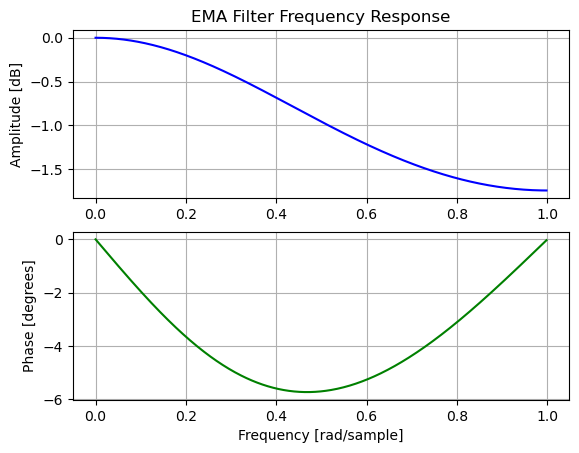

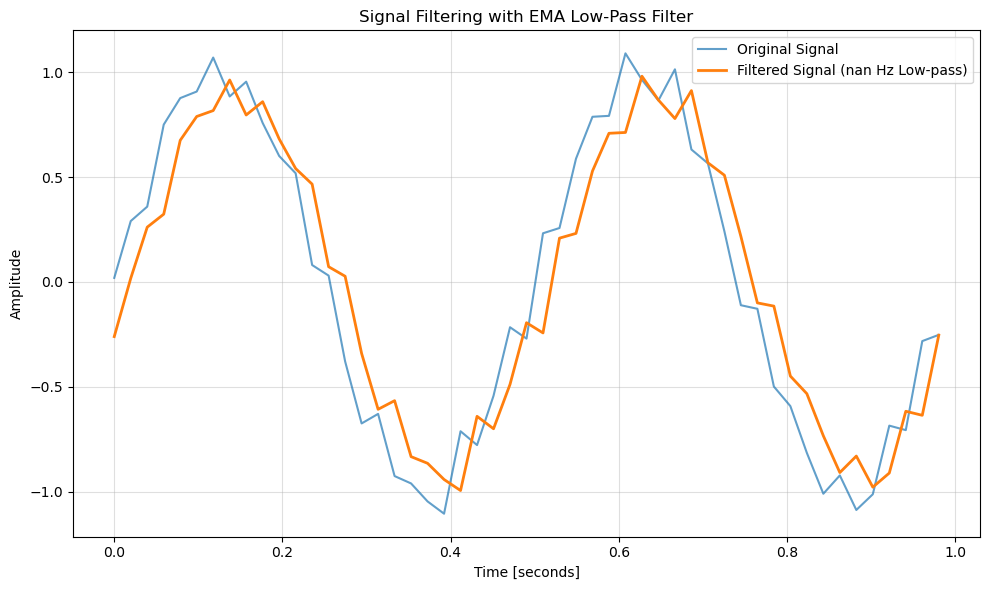

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# EMA Parameters
alpha = 0.9  # Smoothing factor

filter_order = 0
# Transfer Function Coefficients
b = [alpha]
a = [1, alpha - 1]

# y[n] = b0*x[n] + b1*x[n-1] + ... + bk*x[n-k] - a1*y[n-1] - ... - ak*y[n-k]
# 𝑦[𝑛]=(1−𝛼)𝑦[𝑛−1]+𝛼𝑥[𝑛]

fs = 50

pi = np.pi

f3db = fs/(2*pi)*np.arccos(1-(alpha**2)/(2*(1-alpha)))


# Frequency Axis
w, h = signal.freqz(b, a)

# Plotting
plt.figure()

# Magnitude Response
plt.subplot(2, 1, 1)
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
plt.title('EMA Filter Frequency Response')
plt.ylabel('Amplitude [dB]')
plt.grid()

# Phase Response
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.unwrap(np.angle(h))*180/np.pi, 'g')
plt.ylabel('Phase [degrees]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

plt.show()


#Generate Test Signal (Simulating a Continuous Signal with Noise)
t = np.linspace(0, 1, fs+1, False)
sig = np.sin(2*np.pi*2*t) + 0.1*np.sin(2*np.pi*20*t) + 0.05 * np.random.randn(fs+1)  # Added some noise

# Filtering in Real-Time
filtered_signal = []
for sample in sig:
    x.pop(0)
    x.append(sample)

    filtered_sample = sum(b[i] * x[-i] for i in range(filter_order+1))
    filtered_sample -= sum(a[i] * y[-i] for i in range(1, filter_order+1))

    y.pop(0)
    y.append(filtered_sample)

    filtered_signal.append(filtered_sample)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.plot(t, sig, label='Original Signal', alpha=0.7)  # Make the original signal slightly transparent
plt.plot(t, filtered_signal, label=f'Filtered Signal ({f3db} Hz Low-pass)', linewidth=2)
plt.title('Signal Filtering with EMA Low-Pass Filter')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.tight_layout()
plt.show()



In [60]:
from collections.abc import Iterable
import torch
import numpy as np

def test_iterable():
    tests = [
        ([1, 2, 3], True),  # List: Iterable
        (torch.tensor([1, 2, 3]), True),  # PyTorch tensor: Iterable
        ((1, 2, 3), True),  # Tuple: Iterable
        (np.array([1, 2, 3]), True),  # NumPy array: Iterable
        (slice(1, 3), False),  # Slice object: NOT iterable
        (4, False),  # Integer: NOT iterable
    ]

    for (a, expected_result) in tests:
        print(f"Testing: {a} (type: {type(a)})")
        assert isinstance(a, Iterable) == expected_result

test_iterable()


Testing: [1, 2, 3] (type: <class 'list'>)
Testing: tensor([1, 2, 3]) (type: <class 'torch.Tensor'>)
Testing: (1, 2, 3) (type: <class 'tuple'>)
Testing: [1 2 3] (type: <class 'numpy.ndarray'>)
Testing: slice(1, 3, None) (type: <class 'slice'>)
Testing: 4 (type: <class 'int'>)


In [91]:
a = slice(4)


(0, 1, 1)

In [30]:



import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import torch


# y[n] = b0*x[n] + b1*x[n-1] + ... + bk*x[n-k] - a1*y[n-1] - ... - ak*y[n-k]


cut_off_frequency = 10
fs = 50
filter_order = 2 # Filter order

b, a = signal.butter(N=filter_order, Wn=cut_off_frequency, btype='low', analog=False,fs=50)

# Frequency Axis
w, h = signal.freqz(b, a)

# # Plotting
# plt.figure()
# # Magnitude Response
# plt.subplot(2, 1, 1)
# plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.title('Butterworth Lowpass Filter Frequency Response')
# plt.ylabel('Amplitude [dB]')
# plt.grid()
# # Phase Response
# plt.subplot(2, 1, 2)
# plt.plot(w/np.pi, np.unwrap(np.angle(h))*180/np.pi, 'g')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.ylabel('Phase [degrees]')
# plt.xlabel('Frequency [rad/sample]')
# plt.grid()

# plt.show()
# print(a,b)


x = [0] * filter_order    # Input sample buffer
y = [0] * filter_order    # Output sample buffer

# Generate Test Signal (Simulating a Continuous Signal with Noise)
t = np.linspace(0, 1, fs+1, True)
sig = np.sin(2*np.pi*2*t) + 0.1*np.sin(2*np.pi*20*t) + 0.05 * np.random.randn(fs+1)  # Added some noise

# Filtering in Real-Time
filtered_signal = []
for sample in sig:
    x.pop(0)
    x.append(sample)
    # print(len(x))
    filtered_sample = sum(b[i] * x[-i] for i in range(filter_order+1))
    filtered_sample -= sum(a[i] * y[-i] for i in range(1, filter_order+1))

    y.pop(0)
    y.append(filtered_sample)

    filtered_signal.append(filtered_sample)

# # Plotting
# plt.figure(figsize=(6, 4))  # Adjust the figure size for better visualization
# plt.plot(t, sig, label='Original Signal', alpha=0.7)  # Make the original signal slightly transparent
# plt.plot(t, filtered_signal, label=f'Filtered Signal ({cut_off_frequency} Hz Low-pass)', linewidth=2)
# plt.title('Signal Filtering with Butterworth Low-Pass Filter (Zero-Phase)')
# plt.xlabel('Time [seconds]')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(alpha=0.4)  # Add a subtle grid
# plt.tight_layout()
# plt.show()

In [28]:
# y[n] = b0*x[n] + b1*x[n-1] + ... + bk*x[n-k] - a1*y[n-1] - ... - ak*y[n-k]


In [29]:
list(range(filter_order+1))

[0, 1, 2]

In [27]:
a,b

(array([ 1.        , -0.36952738,  0.19581571]),
 array([0.20657208, 0.41314417, 0.20657208]))

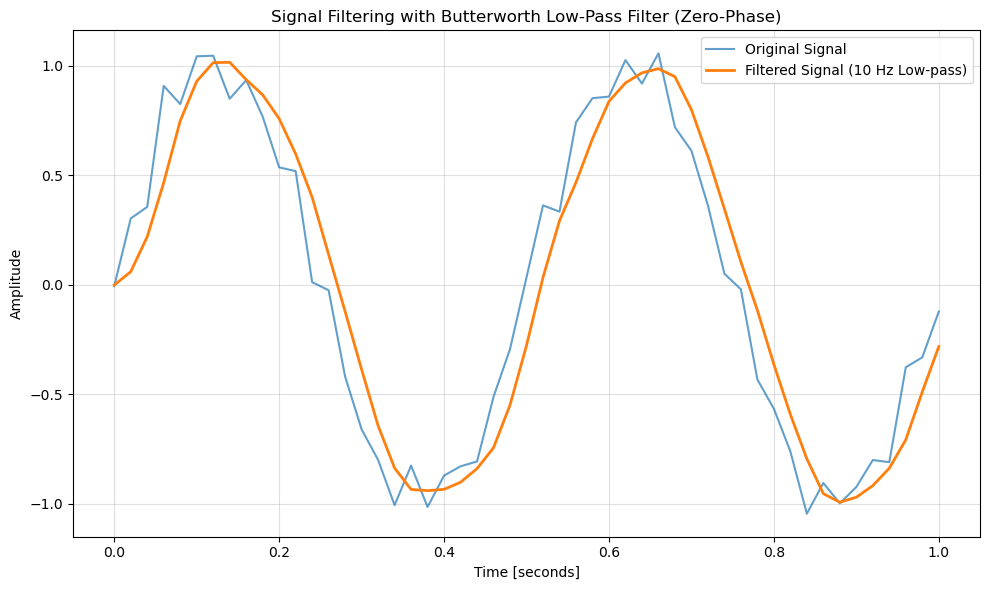

In [33]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import torch
# from .common.buffer import BatchedRingBufferWithSharedCounter, RingBufferCounter
from common.buffer import RingTensorBuffer

# y[n] = b0*x[n] + b1*x[n-1] + ... + bk*x[n-k] - a1*y[n-1] - ... - ak*y[n-k]


cut_off_frequency = 10
fs = 50
filter_order = 2 # Filter order
b, a = signal.butter(N=filter_order, Wn=cut_off_frequency, btype='low', analog=False,fs=50)

# # Frequency Axis
# w, h = signal.freqz(b, a)

# # Plotting
# plt.figure()

# # Magnitude Response
# plt.subplot(2, 1, 1)
# plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.title('Butterworth Lowpass Filter Frequency Response')
# plt.ylabel('Amplitude [dB]')
# plt.grid()


# # Phase Response
# plt.subplot(2, 1, 2)
# plt.plot(w/np.pi, np.unwrap(np.angle(h))*180/np.pi, 'g')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.ylabel('Phase [degrees]')
# plt.xlabel('Frequency [rad/sample]')
# plt.grid()

# plt.show()


a = torch.tensor(a)
b = torch.tensor(b)


x = RingTensorBuffer(buffer_len=filter_order+1,shape=1) # Input sample buffer
y = RingTensorBuffer(buffer_len=filter_order+1,shape=1)# Output sample buffer

t = torch.linspace(0, 1, fs+1)
sig  = torch.sin(2*np.pi*2*t) + 0.1*torch.sin(2*np.pi*20*t) + 0.05 * torch.randn(fs+1) # Added some noise

for k in range(filter_order):
    x.add(0)
    y.add(0)

# Filtering in Real-Time
filtered_signal = []
for sample in sig:
    x.add(sample)
    filtered_sample = (b*x[:].ravel()).sum() - (a[1:filter_order+1]*y[0:filter_order].ravel()).sum()
    y.add(filtered_sample)
    filtered_signal.append(filtered_sample)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.plot(t, sig, label='Original Signal', alpha=0.7)  # Make the original signal slightly transparent
plt.plot(t, filtered_signal, label=f'Filtered Signal ({cut_off_frequency} Hz Low-pass)', linewidth=2)
plt.title('Signal Filtering with Butterworth Low-Pass Filter (Zero-Phase)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.tight_layout()
plt.show()

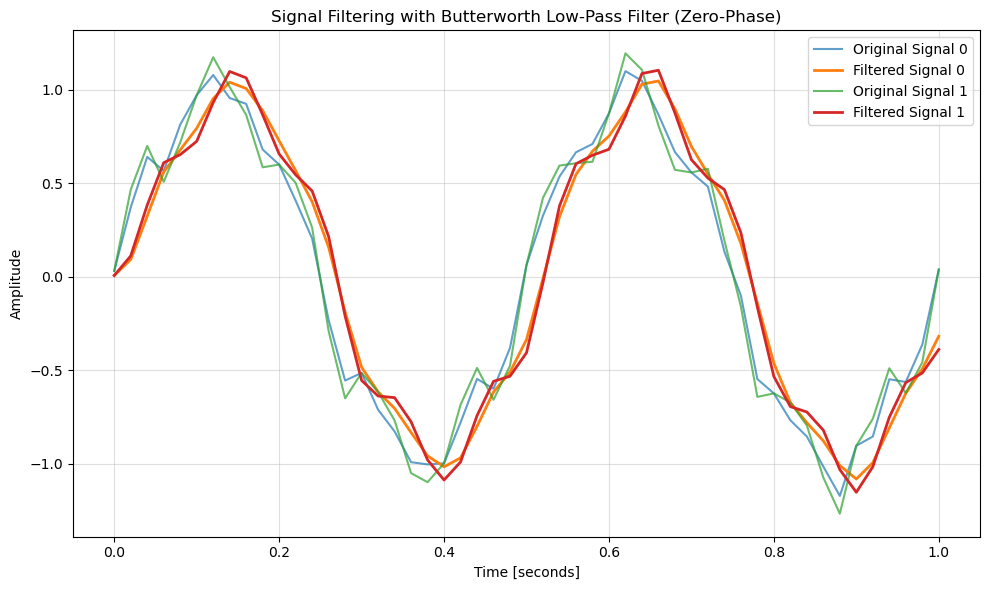

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import torch
# from .common.buffer import BatchedRingBufferWithSharedCounter, RingBufferCounter
from common.buffer import BatchedRingTensorBuffer

# y[n] = b0*x[n] + b1*x[n-1] + ... + bk*x[n-k] - a1*y[n-1] - ... - ak*y[n-k]


cut_off_frequency = 10
fs = 50
filter_order = 2 # Filter order
b, a = signal.butter(N=filter_order, Wn=cut_off_frequency, btype='low', analog=False,fs=50)

# # Frequency Axis
# w, h = signal.freqz(b, a)

# # Plotting
# plt.figure()

# # Magnitude Response
# plt.subplot(2, 1, 1)
# plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.title('Butterworth Lowpass Filter Frequency Response')
# plt.ylabel('Amplitude [dB]')
# plt.grid()


# # Phase Response
# plt.subplot(2, 1, 2)
# plt.plot(w/np.pi, np.unwrap(np.angle(h))*180/np.pi, 'g')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.ylabel('Phase [degrees]')
# plt.xlabel('Frequency [rad/sample]')
# plt.grid()

# plt.show()


a = torch.tensor(a,dtype=torch.float)
b = torch.tensor(b,dtype=torch.float)


num_envs = 2
shape = 1
a = a.repeat_interleave(num_envs).reshape((-1,num_envs,shape))
b = b.repeat_interleave(num_envs).reshape((-1,num_envs,shape))

x = BatchedRingTensorBuffer(buffer_len=filter_order+1,batch_size=num_envs,shape=shape) # Input sample buffer
y = BatchedRingTensorBuffer(buffer_len=filter_order+1,batch_size=num_envs,shape=shape)# Output sample buffer

t = torch.linspace(0, 1, fs+1)

sig_1 = torch.sin(2*np.pi*2*t)
sig_2 = torch.sin(2*np.pi*10*t)
sig_3 = torch.randn(fs+1) # Added some noise
sig = torch.column_stack([sig_1 + 0.1*sig_2 + 0.05*sig_3, 
                          sig_1 + 0.2*sig_2 + 0.05*sig_3]).reshape((-1,2,1))

x.add_and_fill_batch(torch.zeros_like(sig[0]))
y.add_and_fill_batch(torch.zeros_like(sig[0]))

# Filtering in Real-Time
filtered_signal = []
for sample in sig:
    x.add_and_fill_batch(sample)
    filtered_sample = (b*x[:]).sum(dim=0) - (a[1:filter_order+1]*y[0:filter_order]).sum(dim=0)
    y.add_and_fill_batch(filtered_sample)
    filtered_signal.append(filtered_sample)

filtered_signal = torch.stack(filtered_signal)
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
for k in range(num_envs):
    plt.plot(t, sig.reshape((-1,num_envs))[:,k], label=f'Original Signal {k}', alpha=0.7)  # Make the original signal slightly transparent
    plt.plot(t, filtered_signal.reshape((-1,num_envs))[:,k], label=f'Filtered Signal {k}', linewidth=2)
plt.title('Signal Filtering with Butterworth Low-Pass Filter (Zero-Phase)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.tight_layout()
plt.show()

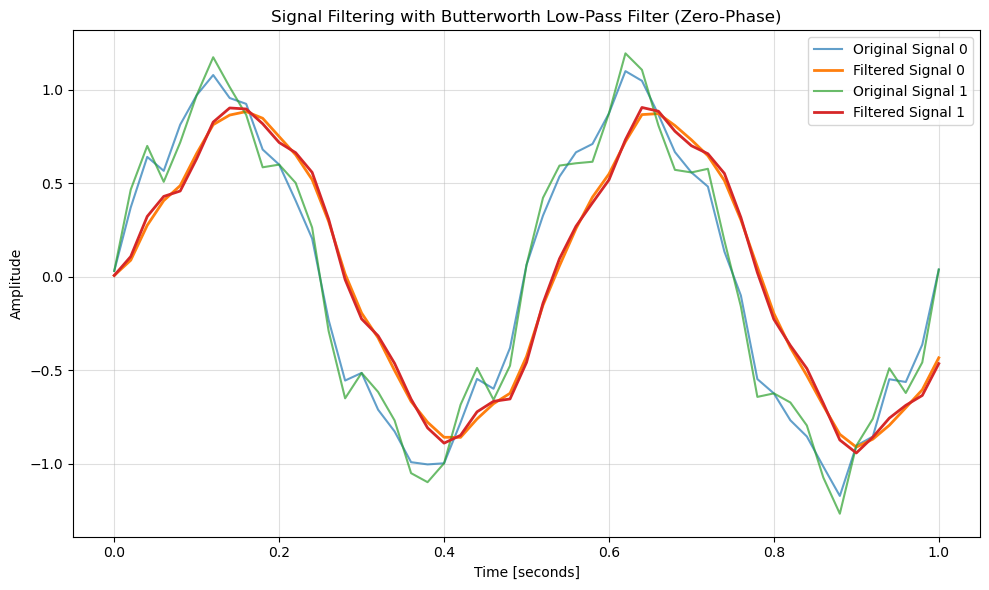

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import torch
# from .common.buffer import BatchedRingBufferWithSharedCounter, RingBufferCounter
from common.buffer import BatchedRingBufferWithSharedCounter, RingBufferCounter

# y[n] = b0*x[n] + b1*x[n-1] + ... + bk*x[n-k] - a1*y[n-1] - ... - ak*y[n-k]


cut_off_frequency = 10
fs = 50
filter_order = 2 # Filter order
b, a = signal.butter(N=filter_order, Wn=cut_off_frequency, btype='low', analog=False,fs=50)

# # Frequency Axis
# w, h = signal.freqz(b, a)

# # Plotting
# plt.figure()

# # Magnitude Response
# plt.subplot(2, 1, 1)
# plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.title('Butterworth Lowpass Filter Frequency Response')
# plt.ylabel('Amplitude [dB]')
# plt.grid()


# # Phase Response
# plt.subplot(2, 1, 2)
# plt.plot(w/np.pi, np.unwrap(np.angle(h))*180/np.pi, 'g')
# plt.axvline(cut_off_frequency/(fs/2), color='green') # cutoff frequency
# plt.ylabel('Phase [degrees]')
# plt.xlabel('Frequency [rad/sample]')
# plt.grid()

# plt.show()


a = torch.tensor(a,dtype=torch.float)
b = torch.tensor(b,dtype=torch.float)


num_envs = 2
shape = 1
a = a.repeat_interleave(num_envs).reshape((-1,num_envs,shape))
b = b.repeat_interleave(num_envs).reshape((-1,num_envs,shape))


counter = RingBufferCounter(buffer_len=filter_order+1,batch_size=num_envs,)
x = BatchedRingBufferWithSharedCounter(counter=counter,shape=shape) # Input sample buffer
y = BatchedRingBufferWithSharedCounter(counter=counter,shape=shape)# Output sample buffer

t = torch.linspace(0, 1, fs+1)

# sig_1 = torch.sin(2*np.pi*2*t)
# sig_2 = torch.sin(2*np.pi*10*t)
# sig_3 = torch.randn(fs+1) # Added some noise

sig = torch.column_stack([sig_1 + 0.1*sig_2 + 0.05*sig_3, 
                          sig_1 + 0.2*sig_2 + 0.05*sig_3]).reshape((-1,2,1))

counter.increment_step()
counter.warm_start_batch()
x.add_and_fill_batch(torch.zeros_like(sig[0]))
y.add_and_fill_batch(torch.zeros_like(sig[0]))

# Filtering in Real-Time
filtered_signal = []
for sample in sig:
    
    counter.increment_step()
    counter.warm_start_batch()

    x.add_and_fill_batch(sample)
    filtered_sample = (b*x[:]).sum(dim=0) - (a[1:filter_order+1]*y[0:filter_order]).sum(dim=0)
    y.add_and_fill_batch(filtered_sample)
    filtered_signal.append(filtered_sample)

filtered_signal = torch.stack(filtered_signal)
# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
for k in range(num_envs):
    plt.plot(t, sig.reshape((-1,num_envs))[:,k], label=f'Original Signal {k}', alpha=0.7)  # Make the original signal slightly transparent
    plt.plot(t, filtered_signal.reshape((-1,num_envs))[:,k], label=f'Filtered Signal {k}', linewidth=2)
plt.title('Signal Filtering with Butterworth Low-Pass Filter (Zero-Phase)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.tight_layout()
plt.show()

In [13]:
sig[:,1,:].ravel()

tensor([ 0.3305,  0.8589,  0.9139,  0.9225,  0.6923,  0.5265, -0.0122, -0.6033,
        -0.9754, -1.0064, -0.6953, -0.4475,  0.0165,  0.3262,  0.6491,  1.0456,
         0.9355,  0.5165,  0.0719, -0.5139, -0.7183, -0.8759, -0.9840, -0.8265,
        -0.3307,  0.0016,  0.4338,  0.6990,  1.0644,  1.0094,  0.5657,  0.0074,
        -0.4735, -0.6659, -1.0119, -0.9999, -0.7429, -0.3471,  0.2878,  0.7302,
         0.9469,  0.8740,  0.7460,  0.3392, -0.1613, -0.5433, -1.0713, -1.0794,
        -0.8331, -0.4272, -0.0199])

In [72]:
sig.shape

torch.Size([51, 2, 1])

In [13]:
x[0:filter_order+1]

tensor([[0.],
        [1.]])

In [14]:
b

tensor([0.2066, 0.4131, 0.2066], dtype=torch.float64)

In [12]:
b*x[0:filter_order+1]

tensor([[0.0000, 0.0000, 0.0000],
        [0.2066, 0.4131, 0.2066]], dtype=torch.float64)

tensor(1.8745e+08, dtype=torch.float64)

In [105]:
x.storage

tensor([[-0.0704],
        [-0.8393],
        [-1.0709],
        [-0.9001],
        [-1.0615],
        [-0.9576],
        [-0.7725],
        [-0.7746],
        [-0.3852],
        [-0.1728]])

(<Figure size 600x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Tree Graph'}>)

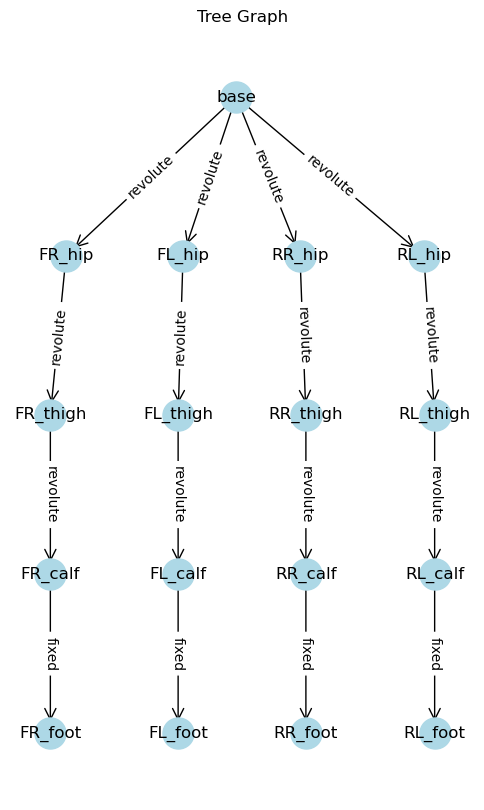

In [2]:
import yourdfpy
import matplotlib.pyplot as plt

asset_path = '../../evolutionary_loop/assets/robogrammar_bank/robot_1350/robot.urdf'
urdf = yourdfpy.URDF.load(
                asset_path,
                build_scene_graph=False,
                load_meshes=False,
                load_collision_meshes=True,
                build_collision_scene_graph=True)

In [5]:
joint_name, joint =next(iter(urdf.joint_map.items()))

(<Figure size 600x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Tree Graph'}>)

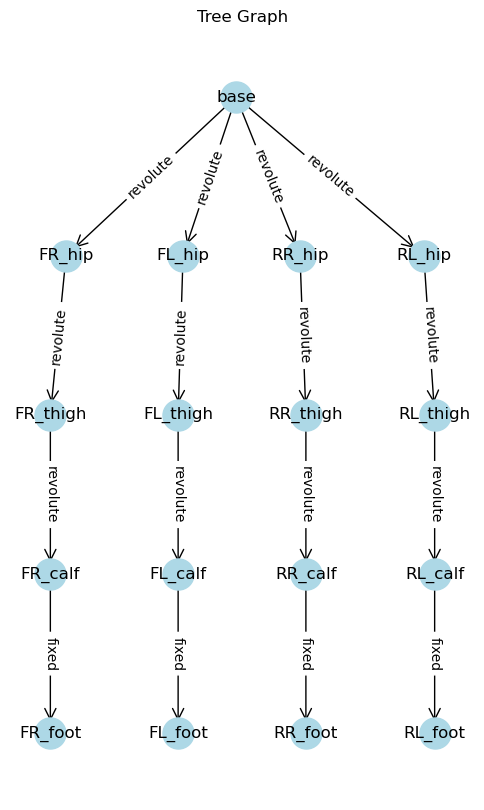

In [39]:
import networkx as nx


def urdf_to_graph(urdf) -> nx.DiGraph:
    graph = nx.DiGraph()
    for joint_name,joint in urdf.joint_map.items():
        graph.add_edge(joint.parent, joint.child, type=joint.type, name = joint_name)
    return graph


def plot_graph(graph: nx.DiGraph,figsize=(6, 10)):
    """
    plot the graph using networkx library
    """
    fig, ax = plt.subplots(figsize=figsize)
    pos = nx.nx_agraph.graphviz_layout(graph, prog='dot')
    nx.draw_networkx_nodes(graph, pos, ax=ax,node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(graph, pos, ax=ax,arrows=True, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(graph, pos,ax=ax, font_size=12, font_family='sans-serif')
    edge_labels = {(u, v): graph[u][v]['type'] for u, v in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos,ax=ax,  edge_labels=edge_labels)

    plt.axis('off')  # Turn off axis labels
    plt.title("Tree Graph")
    return fig,ax

G = urdf_to_graph(urdf)
plot_graph(G)


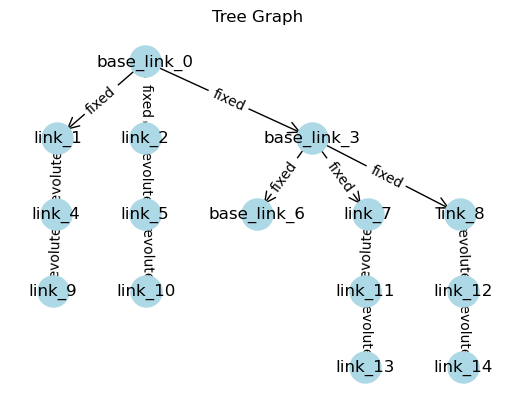

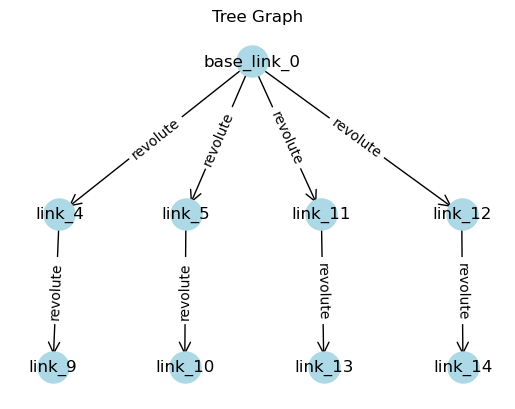

In [83]:
base_link = urdf.base_link
# find all joints connected to base_link

def remove_fixed_joint(graph, parent):
    frontiers = [parent]
    while len(frontiers) > 0:
        parent = frontiers.pop(0)
        if parent not in graph:
            continue
        for child in list(graph[parent]):
            if graph[parent][child]['type'] == 'fixed':
                for grand_child in graph[child]:
                    graph.add_edge(parent, grand_child, **graph[child][grand_child])  # Reset 'fixed' for the new edge
                    frontiers.append(grand_child)
                # Remove the old node and its associated edges
                graph.remove_node(child)
                frontiers.append(parent) # check again
            else:
                frontiers.append(child)
    return graph
G_collapsed = remove_fixed_joint(G.copy(), base_link)

plot_graph(G)
plot_graph(G_collapsed)

In [36]:
G_collapsed.nodes

NodeView(('base_link_0', 'link_4', 'link_5', 'base_link_6', 'link_7', 'link_8', 'link_9', 'link_10', 'link_11', 'link_12', 'link_13', 'link_14'))

In [22]:
print(G.edges(data=True))

[('base_link_0', 'link_1', {'type': 'fixed', 'name': 'joint_1'}), ('base_link_0', 'link_2', {'type': 'fixed', 'name': 'joint_2'}), ('base_link_0', 'base_link_3', {'type': 'fixed', 'name': 'base_joint_3'}), ('link_1', 'link_4', {'type': 'revolute', 'name': 'joint_4'}), ('link_2', 'link_5', {'type': 'revolute', 'name': 'joint_5'}), ('base_link_3', 'base_link_6', {'type': 'fixed', 'name': 'base_joint_6'}), ('base_link_3', 'link_7', {'type': 'fixed', 'name': 'joint_7'}), ('base_link_3', 'link_8', {'type': 'fixed', 'name': 'joint_8'}), ('link_4', 'link_9', {'type': 'revolute', 'name': 'joint_9'}), ('link_5', 'link_10', {'type': 'revolute', 'name': 'joint_10'}), ('link_7', 'link_11', {'type': 'revolute', 'name': 'joint_11'}), ('link_8', 'link_12', {'type': 'revolute', 'name': 'joint_12'}), ('link_11', 'link_13', {'type': 'revolute', 'name': 'joint_13'}), ('link_12', 'link_14', {'type': 'revolute', 'name': 'joint_14'})]


In [24]:
G.nodes['base_link_0']

{}

In [18]:
import networkx as nx

def collapse_fixed_edges(graph):
    """Collapses edges in a graph where the 'fixed' attribute is True."""

    fixed_edges = [(u, v) for u, v, data in graph.edges(data=True) if data.get('fixed')]

    for u, v in fixed_edges:
        # Choose one of the vertices to keep (here we keep 'u')
        new_node = u  
        
        # Redirect edges from the removed node ('v') to the kept node ('u')
        for neighbor in graph.neighbors(v):
            if neighbor != u:  # Avoid creating self-loops
                graph.add_edge(new_node, neighbor, fixed=False)  # Reset 'fixed' for the new edge
        
        # Remove the old node and its associated edges
        graph.remove_node(v) 

    return graph

# Example Usage:

# Create a sample graph with fixed edges
graph = nx.Graph()
graph.add_edge("A", "B", fixed=True)
graph.add_edge("B", "C", fixed=False)
graph.add_edge("C", "D", fixed=True)
graph.add_edge("A", "D", fixed=False)

print("Original Graph:")
print(graph.edges(data=True))

# Collapse fixed edges
collapsed_graph = collapse_fixed_edges(graph)

print("\nGraph with Collapsed Fixed Edges:")
print(collapsed_graph.edges(data=True))

Original Graph:
[('A', 'B', {'fixed': True}), ('A', 'D', {'fixed': False}), ('B', 'C', {'fixed': False}), ('C', 'D', {'fixed': True})]

Graph with Collapsed Fixed Edges:
[('A', 'C', {'fixed': False})]


In [9]:
for key,value in urdf.joint_map.items():
    print(key, value)


joint_1 Joint(name='joint_1', type='fixed', parent='base_link_0', child='link_1', origin=array([[1.   , 0.   , 0.   , 0.075],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ]]), axis=array([0., 0., 1.]), dynamics=None, limit=Limit(effort=3.8, velocity=5.4, lower=-3.142, upper=3.142), mimic=None, calibration=None, safety_controller=None)
joint_2 Joint(name='joint_2', type='fixed', parent='base_link_0', child='link_2', origin=array([[1.   , 0.   , 0.   , 0.075],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ]]), axis=array([ 0.,  0., -1.]), dynamics=None, limit=Limit(effort=3.8, velocity=5.4, lower=-3.142, upper=3.142), mimic=None, calibration=None, safety_controller=None)
base_joint_3 Joint(name='base_joint_3', type='fixed', parent='base_link_0', child='base_link_3', origin=array([[1.  , 0.  , 0.  , 0.15],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0

In [2]:
import torch 
torch.tensor([1, 2, 3]).repeat(4,1)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [46]:
import torch

a = torch.empty(4,5).uniform_(0,1)
b = torch.empty(4)
a,b

(tensor([[0.0983, 0.9086, 0.6797, 0.0838, 0.9316],
         [0.3926, 0.6702, 0.0497, 0.8496, 0.5849],
         [0.0845, 0.4135, 0.0875, 0.1039, 0.5357],
         [0.9153, 0.9964, 0.4559, 0.5563, 0.7311]]),
 tensor([5.0790e+16, 3.4413e-41, 5.0705e+16, 3.4413e-41]))

In [47]:
a[:,1] = b.uniform_(2,3)
a[:,1]

tensor([2.2491, 2.3621, 2.7879, 2.9570])

In [48]:
a[:,2] = b.uniform_(5,5.1)
a[:,2]

tensor([5.0578, 5.0836, 5.0093, 5.0838])

In [33]:
a[[1],0].uniform_(2,3)
a[[1],0]

tensor([2.2243])

In [54]:
a = torch.zeros(3,2)
b = torch.empty(3,2)
print(a+b.uniform_(0,1))
print(a+b.uniform_(0,1))

tensor([[0.4446, 0.7251],
        [0.3351, 0.7776],
        [0.2658, 0.0498]])
tensor([[0.0329, 0.7878],
        [0.5010, 0.8820],
        [0.9546, 0.4320]])


In [4]:
@torch.jit.script
def torch_rand_float(lower, upper, shape, device):
    # type: (float, float, Tuple[int, int], str) -> Tensor
    return (upper - lower) * torch.rand(*shape, device=device) + lower

torch_rand_float(0, 1, (4, 5), 'cuda:0')

tensor([[0.4592, 0.3688, 0.6002, 0.7647, 0.9313],
        [0.0359, 0.8937, 0.7543, 0.1022, 0.6944],
        [0.5811, 0.1593, 0.8521, 0.9974, 0.5529],
        [0.1845, 0.3518, 0.8353, 0.8629, 0.5510]], device='cuda:0')

In [10]:
%timeit _ = torch_rand_float(-3, 1, (4096, 12), 'cuda:0')

6.56 µs ± 8.81 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
%timeit _ = torch.empty((4096,12), device='cuda:0').uniform_(-3,1)

3.02 µs ± 7.86 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
rotor_inertia = 0.13*(0.078**2+0.104**2)/2
print(rotor_inertia)

0.0010984999999999999


In [14]:
0.13*(0.104**2)

0.0014060799999999999

In [16]:
rotor_inertia*(20**2)

0.43939999999999996

In [11]:
rotor_inertia*(10**2)

0.10984999999999999

In [17]:
rotor_inertia*(18**2)

0.35591399999999995